#aygazgoruntuisleme




In [ ]:
#This project was created for GlobalAIHub.
#Its main purpose is to create a CNN (Convolutional Neural Network) model by extracting certain animal classes
#from the given image pool and build a *Classification* algorithm.

## 1-Installing the necessary **libraries**

**Libraries for Analysis:**

- **os**: Used for file and directory operations, such as accessing folders or managing files.  
- **numpy**: A powerful library for mathematical computations, arrays, and matrix operations.  
- **cv2** (OpenCV): Facilitates image processing tasks, including reading, editing, and manipulating images.  
- **kagglehub**: Provides quick access to and management of Kaggle datasets.  
- **random**: Used for generating random numbers, shuffling data, and random selection.
- **shutil**: Provides a high-level interface for file operations. It is commonly used for tasks such as copying, moving, renaming, or removing files and directories. Additionally, it includes advanced features like archiving directories into formats such as ZIP or TAR and disk usage analysis.

**TensorFlow and Related Components:**

- **tensorflow**: An open-source library for building and training deep learning models.  
- **ImageDataGenerator**: Handles data augmentation and preprocessing to increase data diversity and robustness during training.  
- **Sequential**: Allows for arranging model layers in a linear stack.  
- **Conv2D**: Performs 2D convolution operations to extract features from images.  
- **MaxPooling2D**: Reduces the spatial dimensions of the feature maps while retaining important features.  
- **Flatten**: Converts multi-dimensional data into one-dimensional arrays.  
- **Dense**: Adds fully connected layers to the model.  
- **Dropout**: Prevents overfitting by randomly disabling some neurons during training.  
- **Input**: Defines the input layer of the model.  
- **Adam**: A widely used optimization algorithm for training deep learning models.  

**Data Visualization and Processing:**

- **matplotlib.pyplot**: A library for data visualization, enabling the creation of graphs, histograms, and other visual representations.  
- **train_test_split**: Splits the dataset into training and testing subsets.  
- **LabelEncoder**: Converts categorical data into numerical format.  
- **to_categorical**: Transforms numerical labels into one-hot encoding.  


In [1]:
import os
import numpy as np
import cv2
import kagglehub
import random
import shutil

import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam


##2-Obtaining the data set and preprocces

### 2.1 - Dataset filter method

A method for filtering and weight balancing the dataset obtained through Kagglehub (taking the same number of data samples from all of them) and saving the resulting image pool to the system.

In [2]:
#Dataset filter method

def create_filtered_dataset(source_dir, target_dir, selected_animals, max_images_per_animal):

    if not os.path.exists(target_dir):
        os.makedirs(target_dir)

    for animal in selected_animals:
        source_animal_dir = os.path.join(source_dir, animal)
        target_animal_dir = os.path.join(target_dir, animal)

        if not os.path.exists(source_animal_dir):
            print(f"folder not found: {source_animal_dir}")
            continue

        if not os.path.exists(target_animal_dir):
            os.makedirs(target_animal_dir)

        # Take all pic in folder
        all_images = [f for f in os.listdir(source_animal_dir) if os.path.isfile(os.path.join(source_animal_dir, f))]

        # Shuffle the images and select the specified amount
        selected_images = random.sample(all_images, min(len(all_images), max_images_per_animal))

        for image in selected_images:
            source_image_path = os.path.join(source_animal_dir, image)
            target_image_path = os.path.join(target_animal_dir, image)

            shutil.copy(source_image_path, target_image_path)



    print("Copy Succesfull!")

###2.2 - **Download** the dataset from "Kaggle"

In [3]:
#Download the dataset from "Kaggle"

rrebirrth_animals_with_attributes_2_path = kagglehub.dataset_download('rrebirrth/animals-with-attributes-2')

print('Data source import complete.')

# Initialize the dictionary to hold paths for each animal
image_paths = {}

#Base directory for your dataset
base_path = "/root/.cache/kagglehub/datasets/rrebirrth/animals-with-attributes-2/versions/1/Animals_with_Attributes2/JPEGImages/"

#Target directory for new dataset
target_path = "filteredImages"

#List of animals to search for
selected_animals = ["collie", "dolphin", "elephant", "fox", "moose", "rabbit", "sheep", "squirrel", "giant+panda", "polar+bear"]

#How many images to get from each class
images_per_class = 650

#Call methods for filter
create_filtered_dataset(base_path, target_path, selected_animals, images_per_class)

100%|██████████| 13.0G/13.0G [02:04<00:00, 112MB/s]

Extracting files...


Data source import complete.
Copy Succesfull!


###2.3 - Resizing and Normalization Method




The data we get may not come from a single source. For this reason, in the *preprocces* part, we need to download and *normalize* this data to the same size. This code block does this.

In [4]:
#Resize and Normalization
def load_and_process_images(data_dir, image_size=(128, 128)):
    images = []
    labels = []
    for class_name in os.listdir(data_dir):
        class_path = os.path.join(data_dir, class_name)
        if os.path.isdir(class_path):
            for file_name in os.listdir(class_path):
                file_path = os.path.join(class_path, file_name)
                img = cv2.imread(file_path)
                if img is not None:
                    img_resized = cv2.resize(img, image_size)
                    img_normalized = img_resized / 255.0
                    images.append(img_normalized)
                    labels.append(class_name)
    return np.array(images), np.array(labels)

####2.3.1 - Resizing and Normalization

In [5]:
data_dir = target_path

X, y = load_and_process_images(data_dir)

print(f"dataset size: {X.shape}")

dataset size: (6500, 128, 128, 3)


The properties of the dataset size in the code we get as output

* 6500 visuals
* 128x128 pixels each



###2.4 - Train-Test Split


In order to be able to test the accuracy of our model as well as train it, we need to keep some of our entire data pool to test our model. The ratio is usually 70%-30% or 80%-20%. I choose the one with more test data for a more detailed test.

In [6]:
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
y_categorical = to_categorical(y_encoded)

# Split the dataset(%70 for Train, %30 for Test)
X_train, X_test, y_train, y_test = train_test_split(X, y_categorical, test_size=0.3, random_state=40)
print(f"Trained data size: {X_train.shape}, Test data size: {X_test.shape}")

Trained data size: (4550, 128, 128, 3), Test data size: (1950, 128, 128, 3)


##3- Augmentation

In image processing, augmentation refers to the process of applying transformations to images to artificially increase the size and diversity of a dataset. This includes operations like rotation, flipping, scaling, cropping, shifting, or adding noise. It helps improve a model's generalization ability by simulating variations in the data. Params:

*   rotation_range=20: Randomly rotates the images by up to 20 degrees.
*   width_shift_range=0.2: Randomly shifts the image horizontally by 20% of its width.
*   height_shift_range=0.2: Randomly shifts the image vertically by 20% of its height.
*   shear_range=0.2: Applies random shear transformations (distorting the image by slanting it).
*   zoom_range=0.2: Randomly zooms in or out of the image by 20%.
*   horizontal_flip=True: Randomly flips the images horizontally.
*   fill_mode='nearest': Fills in the empty pixels created by transformations with the nearest pixel values.





In [7]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

##4-Create the CNN Model

Here’s a step-by-step explanation of the code in simple English:  

1. **Model Definition**:
   - A **Sequential** model is created with a series of layers.  
   - The input shape is defined as `(128, 128, 3)`, representing 128x128 RGB images.  
   - The layers include:
     - A **Conv2D** layer with 32 filters and a `(3, 3)` kernel, using ReLU activation.
     - A **MaxPooling2D** layer to reduce spatial dimensions.
     - A **Flatten** layer to convert 2D feature maps into a 1D vector.
     - Two **Dense** layers:
       - One with 128 neurons and ReLU activation.
       - One with 10 neurons and softmax activation for multi-class classification.

2. **Model Compilation**:
   - The model is compiled with the **Adam** optimizer, a learning rate of `0.001`.
   - The loss function is **categorical_crossentropy**, suitable for multi-class classification.
   - **Accuracy** is used as the evaluation metric.

3. **Data Augmentation**:
   - An `ImageDataGenerator` object is created to apply real-time data augmentation:
     - Images are rotated by up to 20 degrees.
     - Shifted horizontally and vertically by up to 10% of the image size.
     - Randomly flipped horizontally.

4. **Data Generators**:
   - **Training and validation data generators** (`train_generator` and `validation_generator`) are created using `datagen.flow`.
   - The generators take batches of size `32` from `X_train`/`y_train` and `X_test`/`y_test`.

5. **Steps Per Epoch**:
   - **`steps_per_epoch`** is calculated as the total number of training samples divided by the batch size.
   - **`validation_steps`** is calculated similarly for the validation data.

6. **Model Training**:
   - The model is trained using the **`fit`** method:
     - **`train_generator`** is used as the training data.
     - **`validation_generator`** is used as validation data.
     - The model is trained for **20 epochs**.
     - The training process involves `steps_per_epoch` steps for each epoch and `validation_steps` steps for validation.  

This process trains a Convolutional Neural Network (CNN) to classify images into 10 categories using augmented data for improved generalization.

In [8]:
# model
model = Sequential([
    Input(shape=(128, 128, 3)),  # Burada Input kullanılıyor
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# compile
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
# augmentation
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

# traing and test generator
train_generator = datagen.flow(X_train, y_train, batch_size=32)
validation_generator = datagen.flow(X_test, y_test, batch_size=32)

# steps_per_epoch ve validation_steps
steps_per_epoch = len(X_train) // 32
validation_steps = len(X_test) // 32

# train the cnn model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=20,
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps
)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


142/142 ━━━━━━━━━━━━━━━━━━━━ 33s 192ms/step - accuracy: 0.2514 - loss: 4.8616 - val_accuracy: 0.4458 - val_loss: 1.6471
Epoch 2/20
  1/142 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.5625 - loss: 1.5629

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


142/142 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5625 - loss: 1.5629 - val_accuracy: 0.5333 - val_loss: 1.6305
Epoch 3/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 34s 184ms/step - accuracy: 0.4728 - loss: 1.5788 - val_accuracy: 0.4948 - val_loss: 1.4851
Epoch 4/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 693us/step - accuracy: 0.4375 - loss: 1.6055 - val_accuracy: 0.6333 - val_loss: 1.4156
Epoch 5/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 26s 177ms/step - accuracy: 0.5173 - loss: 1.4181 - val_accuracy: 0.4943 - val_loss: 1.4809
Epoch 6/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 652us/step - accuracy: 0.6875 - loss: 1.3800 - val_accuracy: 0.5000 - val_loss: 1.6945
Epoch 7/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 25s 172ms/step - accuracy: 0.5326 - loss: 1.3399 - val_accuracy: 0.5396 - val_loss: 1.4223
Epoch 8/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - accuracy: 0.5938 - loss: 1.2222 - val_accuracy: 0.6000 - val_loss: 1.1781
Epoch 9/20
142/142 ━━━━━━━━━━━━━━━━━━━━ 26s 176ms/step - accuracy: 0.5643 - loss: 1.3007 - val_accur

The validation accuracy and loss of the model improved during the training process, especially after Epoch 12. However, the fluctuations in training accuracy suggest that the model may overfit. To improve the model, work can be done on the learning rate, model structure and regularization techniques. Also, the impact of data augmentation techniques can be increased and the overall performance can be improved by using more epochs.

In [9]:
#Model Test
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy * 100:.2f}%")

61/61 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5881 - loss: 1.2687
Test accuracy: 57.90%


test accuracy as desired (above 50%)

###4.2 - Model Test and Data Visualise

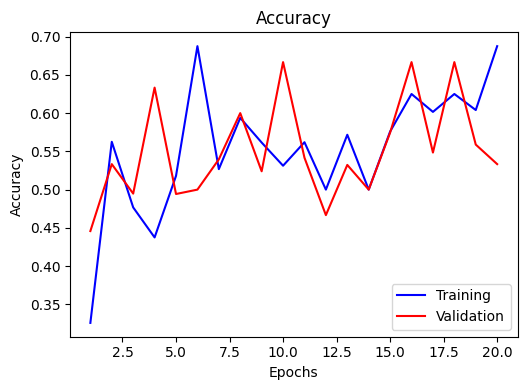

In [10]:
# Extract training and validation values and determine epochs
acc, val_acc, loss, val_loss, epochs = history.history['accuracy'], history.history['val_accuracy'], history.history['loss'], history.history['val_loss'], range(1, len(history.history['accuracy']) + 1)

# Training and verification accuracy
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1); plt.plot(epochs, acc, 'b-', label='Training'); plt.plot(epochs, val_acc, 'r-', label='Validation'); plt.title('Accuracy'); plt.xlabel('Epochs'); plt.ylabel('Accuracy'); plt.legend()

plt.tight_layout(); plt.show()


This chart illustrates the changes in training and validation accuracy across epochs.

- The training accuracy (blue line) initially shows a fluctuating increase and stabilizes after certain epochs.  
- The validation accuracy (red line) generally follows the training accuracy closely but exhibits more fluctuations.  
- The small gap between training and validation accuracy indicates a low risk of overfitting.  
- Overall, model performance is improving, but the fluctuations in validation accuracy suggest that the model struggles to learn effectively in certain epochs.  

In conclusion, the model demonstrates good overall performance, but the variability in validation accuracy indicates room for further improvement.

##5 - Manipulate Methods

We need to test the model again under different lights to see if the model is consistent. This method allows us to examine images under different lighting.

In [11]:
## Manipulate Methods.
def get_manipulated_images(images):
    manipulated_images = []
    for img in images:
        manipulated = cv2.convertScaleAbs(img, alpha=0.8, beta=30)
        manipulated_images.append(manipulated)
    return np.array(manipulated_images)


###5.1 - Manipulate Images

In [12]:
X_test_manipulated = get_manipulated_images(X_test)
manipulated_loss, manipulated_accuracy = model.evaluate(X_test_manipulated, y_test)
print(f"Model accuracy on manipulated data set:{manipulated_accuracy * 100:.2f}")

61/61 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.0976 - loss: 151.4443
Model accuracy on manipulated data set:9.90


The test shows that the model's ability to analyze in different environments is low (approx. 10%), while the loss value is very high (approx. 250,000).

##6 - Gray World Algorithm

In [13]:
def apply_gray_world(image):
    avg_b, avg_g, avg_r = cv2.mean(image)[:3]
    gray_value = (avg_b + avg_g + avg_r) / 3
    scaling_factors = np.array([gray_value / avg_b, gray_value / avg_g, gray_value / avg_r])
    corrected_image = image * scaling_factors
    corrected_image = np.clip(corrected_image, 0, 255).astype(np.uint8)
    return corrected_image


In [14]:
X_test_corrected = np.array([apply_gray_world(img) for img in X_test_manipulated])

corrected_loss, corrected_accuracy = model.evaluate(X_test_corrected, y_test)
print(f"Test Accuracy with Color Constancy Applied: {corrected_accuracy * 100:.2f}%")

61/61 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0976 - loss: 152.5179
Test Accuracy with Color Constancy Applied: 9.90%


The model exhibits a low accuracy rate (9.7%) on the color-fixed test data. This suggests that the model struggles to adapt to color changes and manipulations in lighting conditions. For performance improvements, approaches such as data augmentation, model reconstruction or transfer learning could be considered.

##7 - Results

In [15]:
print("Results:")
print(f"Original Test Set Accuracy: {test_accuracy * 100:.2f}%")
print(f"Manipulated Test Set Accuracy: {manipulated_accuracy * 100:.2f}%")
print(f"Test Set Accuracy with Color Constancy Applied: {corrected_accuracy * 100:.2f}%")

Results:
Original Test Set Accuracy: 57.90%
Manipulated Test Set Accuracy: 9.90%
Test Set Accuracy with Color Constancy Applied: 9.90%


###7.1 Interpretation of Results

Observations: A significant decrease in accuracy was observed between the original test set and the manipulated test set.

Improvement: The application of color constancy did not lead to any noticeable improvement in the accuracy rate. The performance remained low after manipulation.

Overall Comment: It can be concluded that the model is highly sensitive to changes in lighting conditions. However, adjustments like color constancy are insufficient to enhance accuracy. This analysis highlights how the model's performance is affected by environmental factors and its response to manipulations.